## Intro

Government fiscal and monetary policies play an important role in driving investment incentives in numerous sectors, with renewable energy making no exception. 

Several research papers have explicitly proven the positive relationship between such government policies and private investment in renewables, but not all policies seem to have the same level of impact if any at all. According to Azhgaliyeva, Kapsaplyamova, and Low (2018) feed-in tariffs, and loans have a positive impact on green finance. Eyraud, Clements, and Wane (2013) also conclude that feed-in tariffs and feed-in premiums are a driver of investment incentives, whilst Polzin et al. (2015) also identify several other policies, which might affect investor decisions, including production tax reliefs, green certificates, auctions for PPA, and R&D.

The International Energy Agency provides a list of government policies in the clean energy sector implemented over the years. The types of policies provided range from regulations through economic instruments to codes and standards. For our research topic and based on previous works in this field we will take into consideration the following policies, as listed in the IEA Policy Database:

    - Feed-in tarifs/premiums
    - Green certificates
    - Market-based instruments
    - Loan/debt finance
    - Tax relief
    
These policies were implemented on either a national, state/provincial, or international level, with the majority of them still in force, whilst the ones which have ended have been one-off policies (i.e. auctions). 

The indicator we are going to construct concerns the cumulative number of in force government policies plus the number of one-off policies in a given year, enforced in our chosen countries in the time frame from 2000-2020.

In [1]:
import numpy as np

import pandas as pd
import pandasql as ps

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

ModuleNotFoundError: No module named 'pandasql'

In [4]:
df = pd.read_csv('./Data/policies.csv', index_col=0)
df

,Policy,Country,Year,Status,Jurisdiction
0,Action Plan for the Development of Smart Photo...,People's Republic Of China,2018,In force,National
1,Exemption of Vehicle Acquisition Tax for NEVs ...,People's Republic Of China,2018,Ended,National
2,New Hampshire Energy Efficiency Obligation,United States,2018,Ended,State/Provincial
3,Renewable Electricity Quota and Assessment Met...,People's Republic Of China,2018,In force,National
4,2017 Amendment of the Renewable Energy Sources...,Germany,2017,In force,National
...,...,...,...,...,...
159,Tax Reform Act of 1986,United States,1986,Ended,National
160,Economic Recovery Act of 1981,United States,1981,Ended,National
161,Volumetric Ethanol Excise Tax Credit (VEETC),United States,1979,Ended,National
162,Energy Tax Act of 1978,United States,1978,Ended,National


In [5]:
query = """
    SELECT Year, Country, COUNT(*) AS Policies
    FROM df
    WHERE Year >= 2000
    GROUP BY Year, Country
    ORDER BY Country
"""

agg = ps.sqldf(query)
agg['Number of policies'] = agg.groupby('Country')['Policies'].cumsum()
agg.head()

,Year,Country,Policies,Number of policies
0,2000,Germany,1,1
1,2002,Germany,3,4
2,2005,Germany,2,6
3,2006,Germany,1,7
4,2007,Germany,1,8


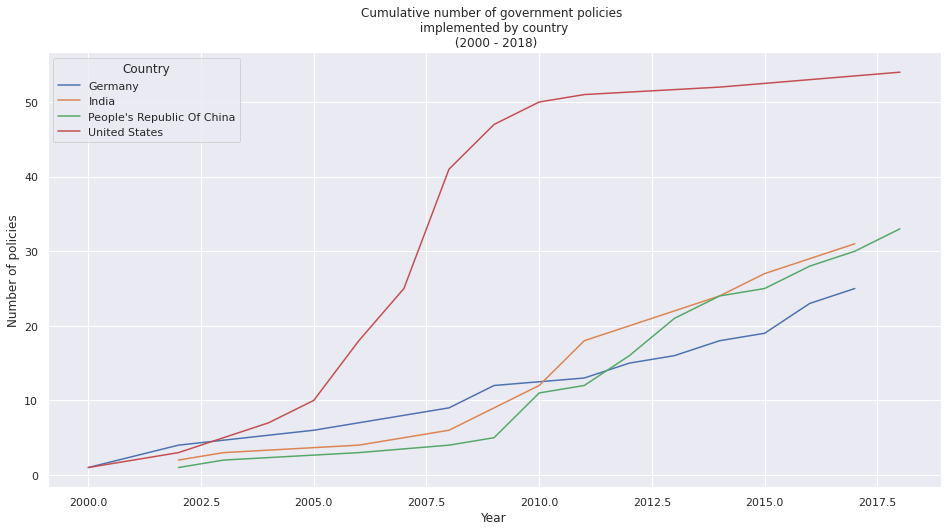

In [6]:
plt.figure(figsize=(16, 8))
h = sns.lineplot(data=agg, x='Year', y='Number of policies', hue='Country')
title = 'Cumulative number of government policies \n implemented by country \n (2000 - 2018)'
h.set_title(title)
h.get_figure().savefig(f'./Plots/{title}')

In [7]:
def reindex(df, start, end):
    idx = np.arange(start, end)
    df = df.reindex(idx, fill_value=0)
        
    return df

ended = df[df['Status'] == 'Ended'].groupby('Year').count()
in_force = df[df['Status'] == 'In force'].groupby('Year').count()

start = df['Year'].values[-1]
end = 2021

ended = reindex(ended, start, end)['Country']
in_force = reindex(in_force, start, end)['Country']

ended
# S = ended + in_force.cumsum()
# S = S[S.index >= 2000]

# plt.figure(figsize=(16, 8))
# h = S.plot()

# title = 'Total cumilative number of government policies \n (2000-2020)'
# h.set_title(title)
# h.set_ylabel('Number of policies')
# h.get_figure().savefig(f'./Plots/{title}')

Year
1978    1
1979    1
1980    0
1981    1
1982    0
1983    0
1984    0
1985    0
1986    1
1987    0
1988    0
1989    0
1990    0
1991    2
1992    1
1993    2
1994    0
1995    0
1996    0
1997    0
1998    0
1999    2
2000    1
2001    1
2002    0
2003    1
2004    1
2005    2
2006    3
2007    0
2008    4
2009    4
2010    2
2011    0
2012    1
2013    1
2014    2
2015    0
2016    2
2017    1
2018    2
2019    0
2020    0
Name: Country, dtype: int64

In [14]:
agg.drop('Policies', axis=1).to_csv('./Data Formated/policies.csv')

In [1]:
agg

NameError: name 'agg' is not defined